In [2]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# plotting options
seaborn.set()
plt.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline


# Load data

### Data downloaded from http://www.countyhealthrankings.org/rankings/data.

In [3]:
datadir = '/home/kristy/Documents/CountyExercisePredictions/'
datafile = '2015CHRAnalyticData.csv'

In [4]:
full_data = pd.read_csv(datadir+datafile, thousands=",")
# specify thousands separator so that numbers encoded as strings will be processed correctly

In [5]:
full_data.head()

,STATECODE,COUNTYCODE,State,County,County that was not ranked,Premature death Value,Premature death Numerator,Premature death Denominator,Premature death Lower Confidence Interval,Premature death Upper Confidence Interval,...,Children eligible for free lunch Value,Children eligible for free lunch Numerator,Children eligible for free lunch Denominator,Children eligible for free lunch Lower Confidence Interval,Children eligible for free lunch Upper Confidence Interval,Homicide rate Value,Homicide rate Numerator,Homicide rate Denominator,Homicide rate Lower Confidence Interval,Homicide rate Upper Confidence Interval
0,1,0,AL,Alabama,NaN,9508,72385,13527993,9409,9607,...,0.500,372509,744621,NaN,NaN,9.1,2971,33176856,8.8,9.5
1,1,1,AL,Autauga County,NaN,8405,754,157345,7554,9257,...,0.383,3767,9825,NaN,NaN,4.6,17,376259,2.7,7.4
2,1,3,AL,Baldwin County,NaN,7457,2460,519994,7006,7908,...,0.344,9875,28700,NaN,NaN,4.3,52,1255425,3.2,5.6
3,1,5,AL,Barbour County,NaN,8901,414,76718,7580,10221,...,0.697,2661,3819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,7,AL,Bibb County,NaN,10729,407,64629,9124,12334,...,0.546,1934,3539,NaN,NaN,7.8,13,158530,4.1,13.3


In [6]:
full_data.shape

(3191, 329)

In [7]:
# Use full FIPS code as the index for each county.
full_data.index = full_data.STATECODE*1000 + full_data.COUNTYCODE

In [8]:
len(full_data.index.value_counts())

3191

## For a first pass, just take the average values without confidence intervals. 

In [9]:
values_only = full_data.filter(regex='.*Value')

In [10]:
# Remove the redundant 'Value' in all column names 
values_only.rename(columns=lambda x: x.replace(' Value', ''), inplace=True)

In [11]:
values_only.head()

,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,Access to exercise opportunities,...,Motor vehicle crash deaths,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate
1000,9508,0.205,4.3,4.3,0.10,0.219,0.332,6.7,0.294,0.641,...,20.89,11.47,0.202,0.043,10127,0.163,48,42882,0.500,9.1
1001,8405,0.228,5.1,3.6,0.09,0.217,0.313,7.2,0.279,0.737,...,21.25,8.23,0.169,0.037,9939,0.156,18,51868,0.383,4.6
1003,7457,0.127,3.3,3.8,0.09,0.206,0.250,7.6,0.252,0.736,...,16.57,15.29,0.199,0.054,9502,0.144,29,47539,0.344,4.3
1005,8901,0.234,4.8,4.3,0.12,0.251,0.384,5.0,0.323,0.441,...,18.67,NaN,0.228,0.045,10414,0.169,11,30981,0.697,NaN
1007,10729,0.179,4.7,5.1,0.13,0.259,0.373,7.6,0.332,0.394,...,25.87,18.93,0.193,0.042,10825,0.163,9,39781,0.546,7.8


## Categorize columns

### PDF documentation at http://www.countyhealthrankings.org/sites/default/files/2015%20CHR%20SAS%20Analytic%20Data%20Documentation.pdf is helpful for this.

In [12]:
all_columns = values_only.columns

In [13]:
for idx, col in enumerate(all_columns):
    print idx, col

0 Premature death
1 Poor or fair health
2 Poor physical health days
3 Poor mental health days
4 Low birthweight
5 Adult smoking
6 Adult obesity
7 Food environment index
8 Physical inactivity
9 Access to exercise opportunities
10 Excessive drinking
11 Alcohol-impaired driving deaths
12 Sexually transmitted infections
13 Teen births
14 Uninsured
15 Primary care physicians
16 Dentists
17 Mental health providers
18 Preventable hospital stays
19 Diabetic screening
20 Mammography screening
21 High school graduation
22 Some college
23 Unemployment
24 Children in poverty
25 Income inequality
26 Children in single-parent households
27 Social associations
28 Violent crime
29 Injury deaths
30 Air pollution - particulate matter
31 Drinking water violations
32 Severe housing problems
33 Driving alone to work
34 Long commute - driving alone
35 2011 population estimate
36 Population that is not proficient in English
37 Population living in a rural area
38 Diabetes
39 HIV prevalence rate
40 Premature 

In [14]:
inactivity = all_columns[8] # this is the outcome variable
health_outcomes = all_columns[0:4] | all_columns[38:42]
health_behaviors = all_columns[5:7] | all_columns[9:13]
clinical_care = all_columns[14:20] | all_columns[47:51]
social_economic = all_columns[21:29] | all_columns[52:54]
physical_environment = all_columns[30:34]
population = all_columns[35:37]

In [15]:
health_behaviors

Index([u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking',
       u'Alcohol-impaired driving deaths', u'Excessive drinking',
       u'Sexually transmitted infections'],
      dtype='object')

# Look at variables and make list to include as covariates

## Outcome: % of adults who get no physical activity

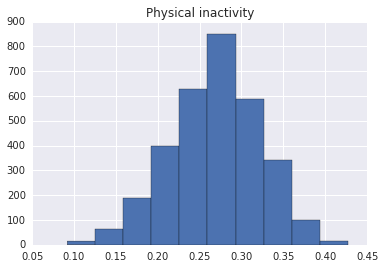

In [16]:
values_only[inactivity].hist();
plt.title(inactivity);

## Health outcomes

Index([u'Diabetes', u'HIV prevalence rate', u'Infant mortality',
       u'Poor mental health days', u'Poor or fair health',
       u'Poor physical health days', u'Premature age-adjusted mortality',
       u'Premature death'],
      dtype='object')


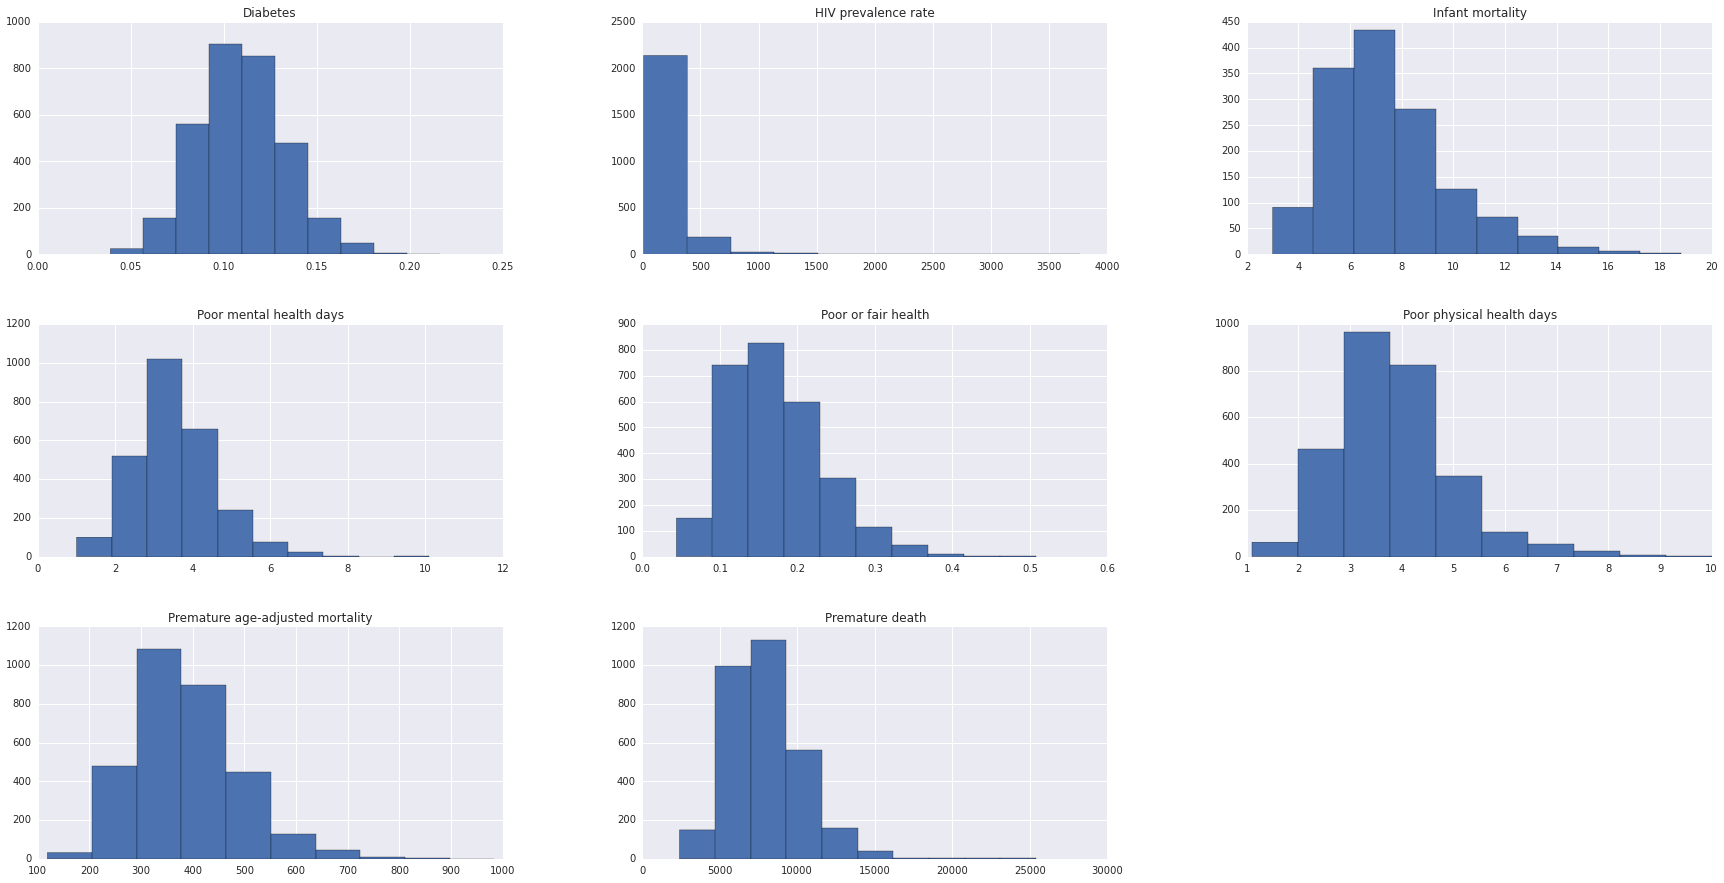

In [17]:
print(health_outcomes)

values_only[health_outcomes].hist(figsize=[30,15]);

In [18]:
# Start building list of covariates to include
covariates = [u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health',
                             u'Premature age-adjusted mortality']

In [19]:
print(covariates)

[u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health', u'Premature age-adjusted mortality']


## Health behaviors

Index([u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking',
       u'Alcohol-impaired driving deaths', u'Excessive drinking',
       u'Sexually transmitted infections'],
      dtype='object')


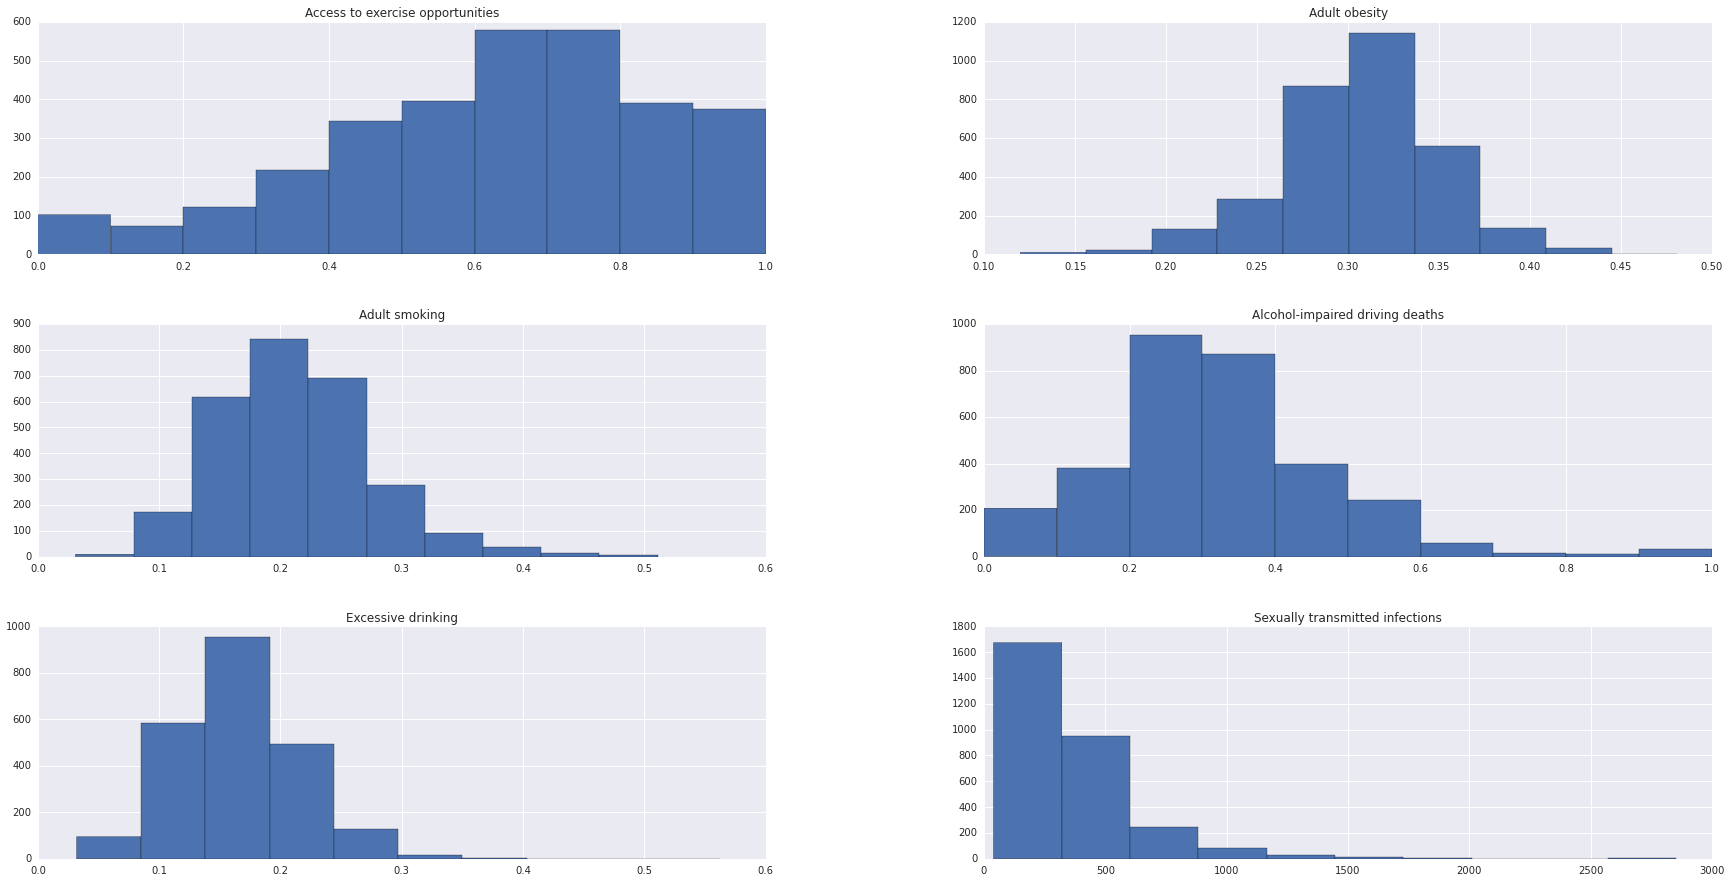

In [20]:
print(health_behaviors)

values_only[health_behaviors].hist(figsize=[30,15]);

In [21]:
# Update list of covariates to include
covariates = covariates + [u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking',
                                u'Excessive drinking', u'Sexually transmitted infections']

covariates

[u'Diabetes',
 u'HIV prevalence rate',
 u'Infant mortality',
 u'Poor or fair health',
 u'Premature age-adjusted mortality',
 u'Access to exercise opportunities',
 u'Adult obesity',
 u'Adult smoking',
 u'Excessive drinking',
 u'Sexually transmitted infections']

## Clinical care

Index([u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening',
       u'Health care costs', u'Mental health providers',
       u'Preventable hospital stays', u'Primary care physicians', u'Uninsured',
       u'Uninsured adults', u'Uninsured children'],
      dtype='object')


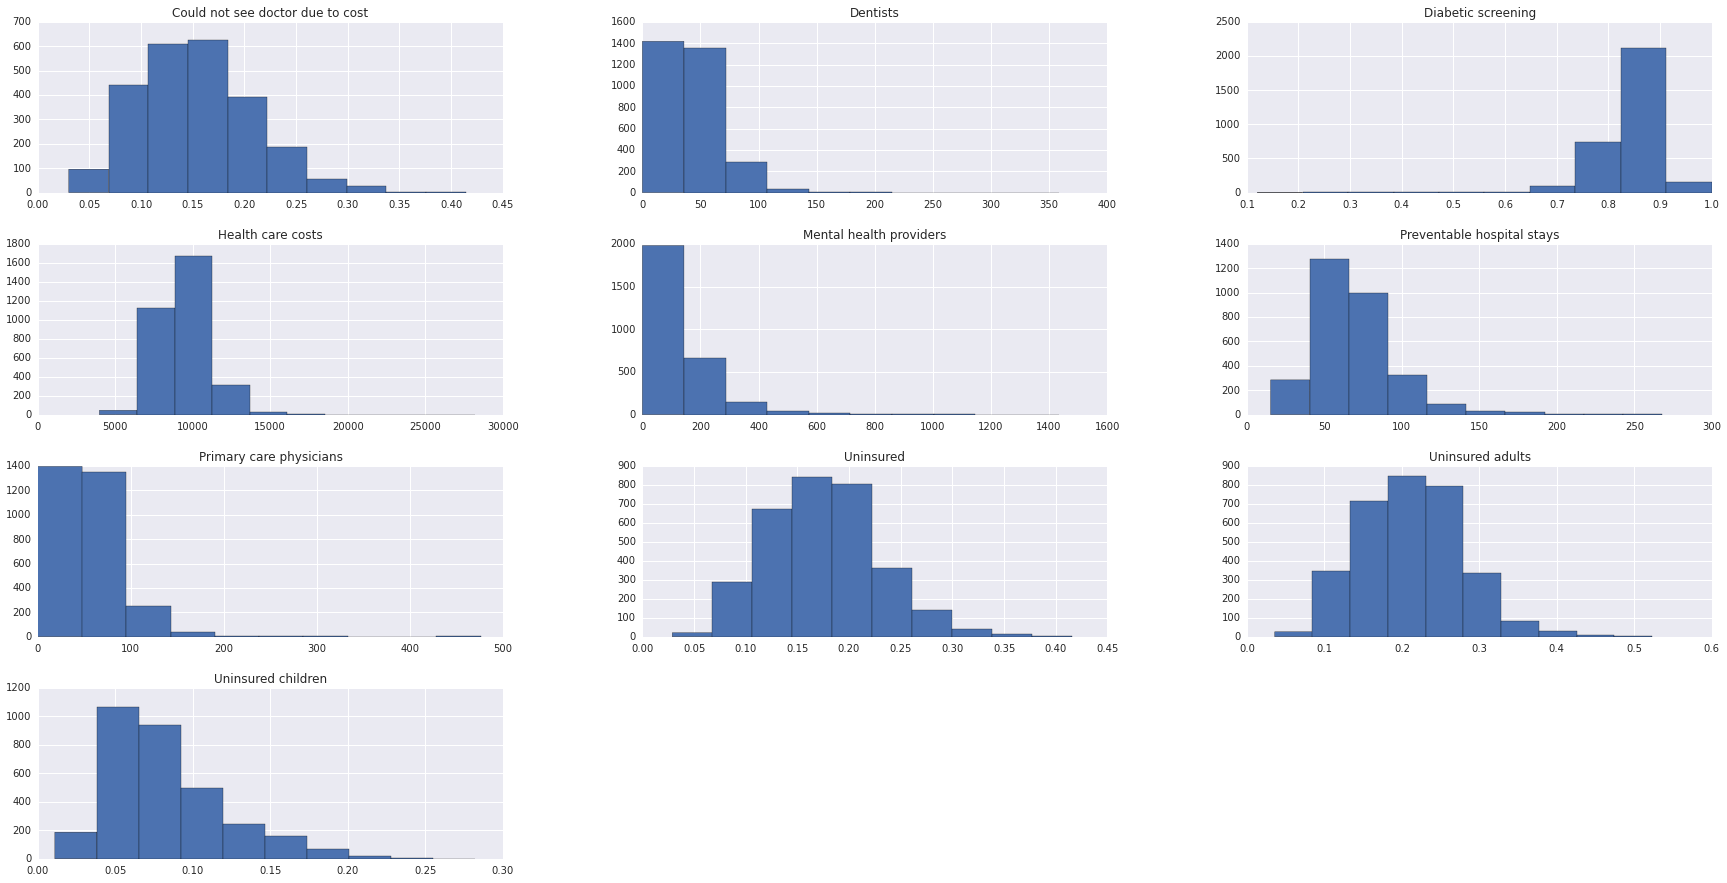

In [22]:
print(clinical_care)

values_only[clinical_care].hist(figsize=[30,15]);

In [23]:
# Update list of covariates to include
covariates = covariates + [u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening',
                           u'Health care costs', u'Mental health providers', u'Preventable hospital stays', 
                           u'Primary care physicians', u'Uninsured']

print(covariates)

[u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health', u'Premature age-adjusted mortality', u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking', u'Excessive drinking', u'Sexually transmitted infections', u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening', u'Health care costs', u'Mental health providers', u'Preventable hospital stays', u'Primary care physicians', u'Uninsured']


## Social and economic

Index([u'Children eligible for free lunch', u'Children in poverty',
       u'Children in single-parent households', u'High school graduation',
       u'Income inequality', u'Median household income',
       u'Social associations', u'Some college', u'Unemployment',
       u'Violent crime'],
      dtype='object')


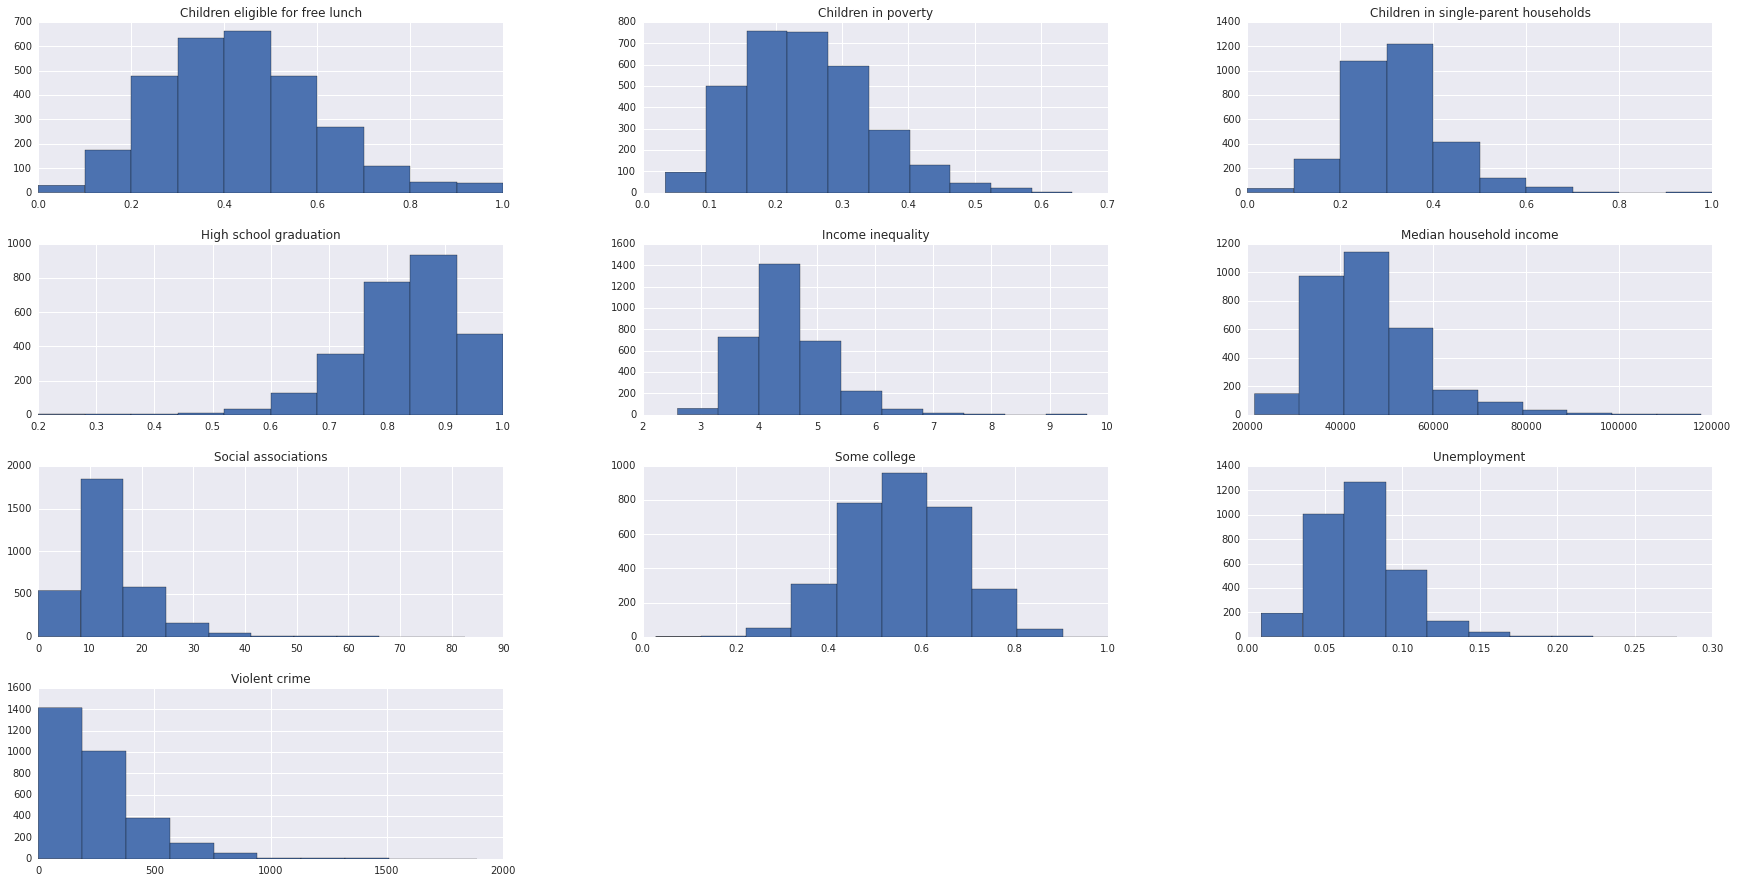

In [24]:
print(social_economic)

values_only[social_economic].hist(figsize=[30,15]);

In [25]:
# Update list of covariates to include
covariates = covariates + [ u'Children in poverty', u'Children in single-parent households', u'High school graduation', 
                           u'Income inequality', u'Median household income', u'Social associations', 
                           u'Some college', u'Unemployment', u'Violent crime']

print(covariates)

[u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health', u'Premature age-adjusted mortality', u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking', u'Excessive drinking', u'Sexually transmitted infections', u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening', u'Health care costs', u'Mental health providers', u'Preventable hospital stays', u'Primary care physicians', u'Uninsured', u'Children in poverty', u'Children in single-parent households', u'High school graduation', u'Income inequality', u'Median household income', u'Social associations', u'Some college', u'Unemployment', u'Violent crime']


## Physical environment

Index([u'Air pollution - particulate matter', u'Drinking water violations',
       u'Severe housing problems', u'Driving alone to work'],
      dtype='object')


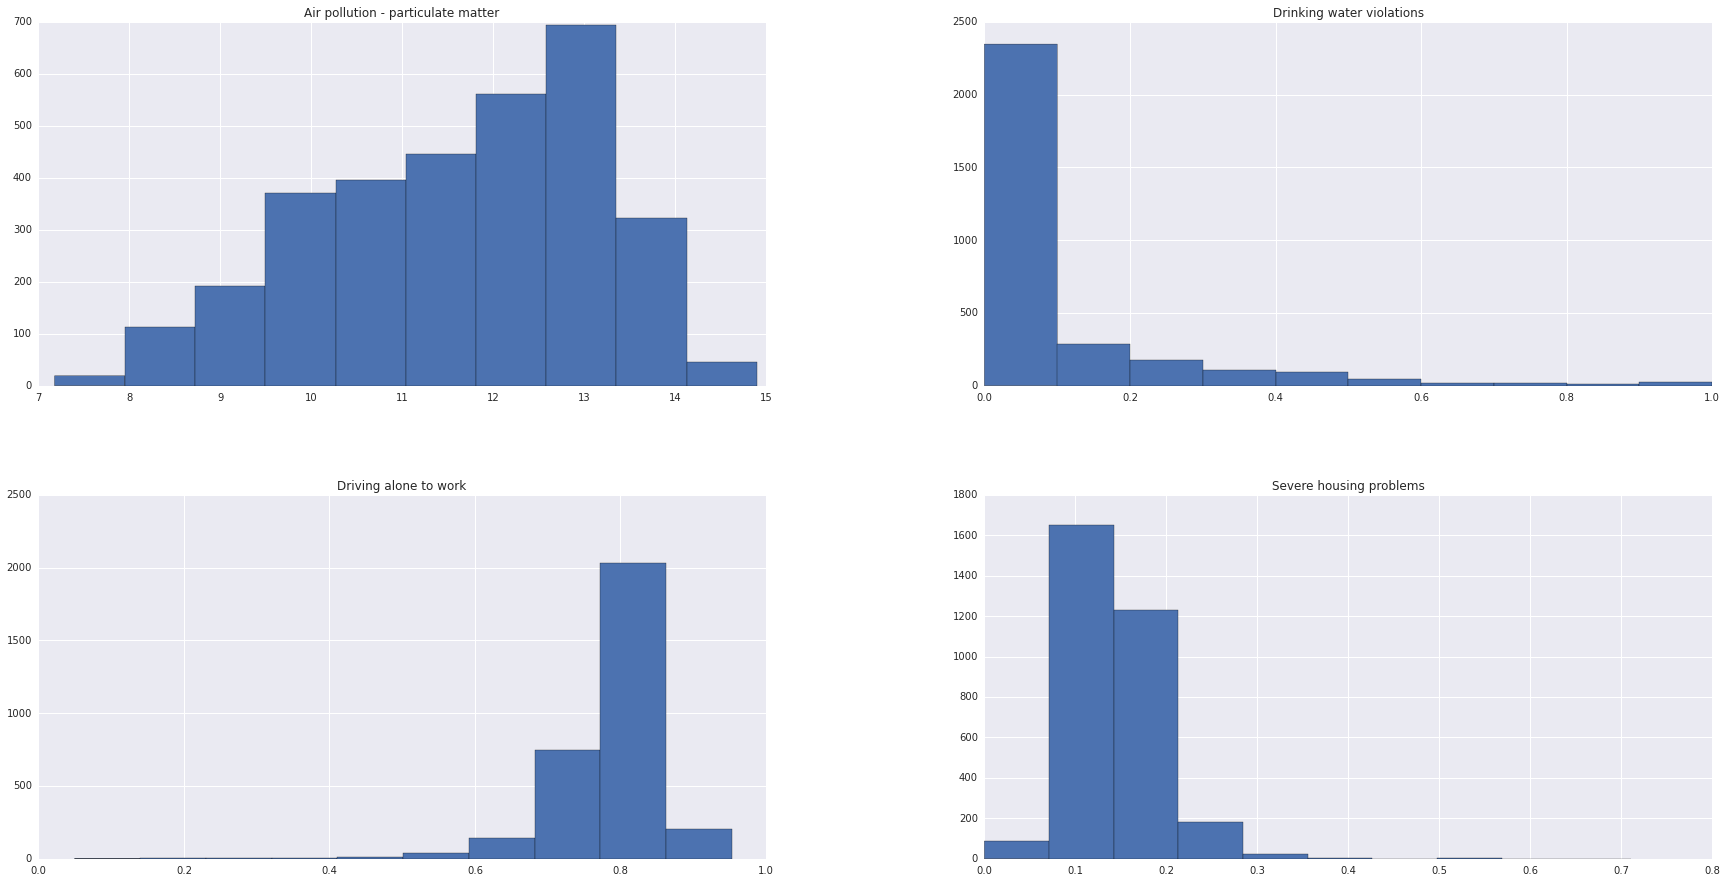

In [26]:
print(physical_environment)

values_only[physical_environment].hist(figsize=[30,15]);

In [27]:
# Update list of covariates to include
covariates = covariates + [u'Air pollution - particulate matter', u'Drinking water violations', 
                           u'Severe housing problems']

print(covariates)

[u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health', u'Premature age-adjusted mortality', u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking', u'Excessive drinking', u'Sexually transmitted infections', u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening', u'Health care costs', u'Mental health providers', u'Preventable hospital stays', u'Primary care physicians', u'Uninsured', u'Children in poverty', u'Children in single-parent households', u'High school graduation', u'Income inequality', u'Median household income', u'Social associations', u'Some college', u'Unemployment', u'Violent crime', u'Air pollution - particulate matter', u'Drinking water violations', u'Severe housing problems']


## Population

Index([u'2011 population estimate', u'Population that is not proficient in English'], dtype='object')


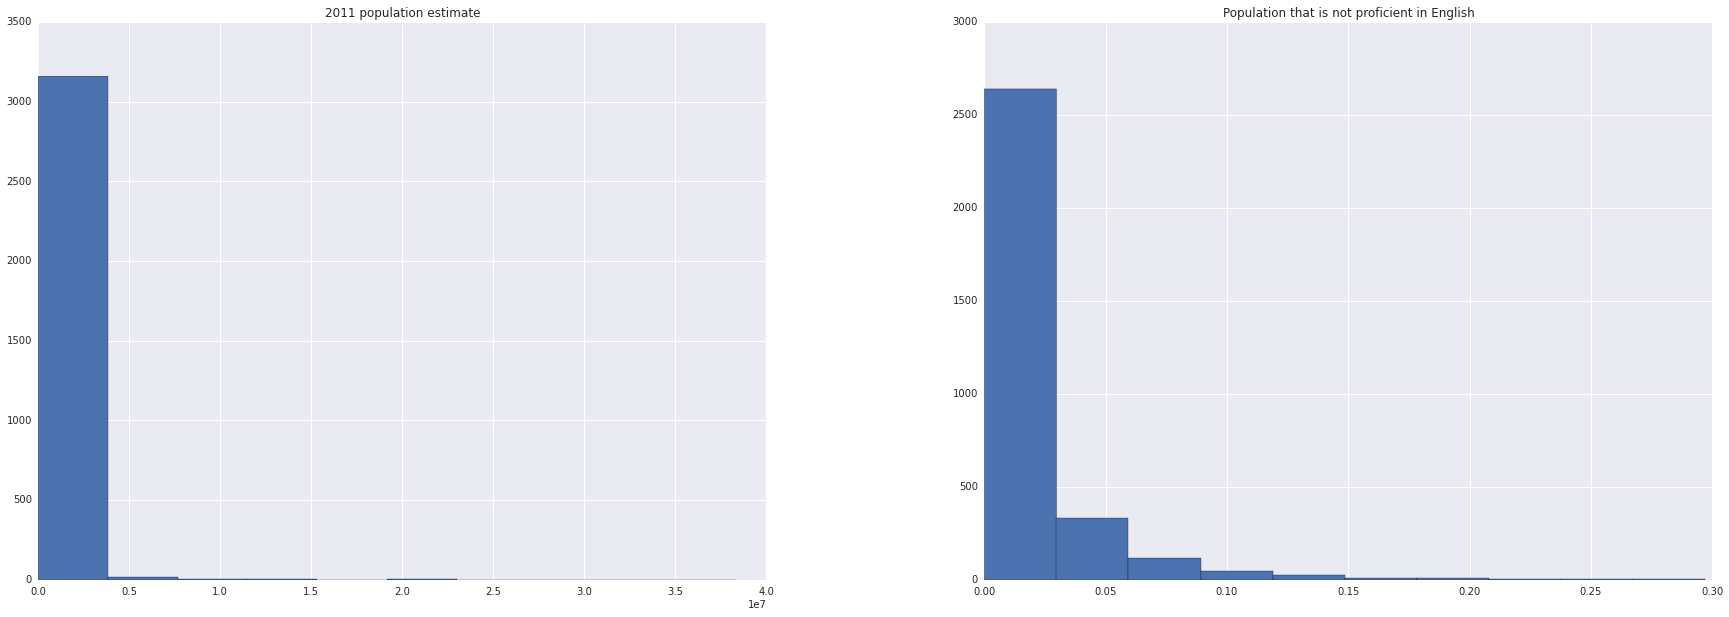

In [28]:
print(population)

values_only[population].hist(figsize=[30,10]);

In [29]:
# Update list of covariates to include
covariates = covariates + [u'2011 population estimate', u'Population that is not proficient in English']

print(covariates)

[u'Diabetes', u'HIV prevalence rate', u'Infant mortality', u'Poor or fair health', u'Premature age-adjusted mortality', u'Access to exercise opportunities', u'Adult obesity', u'Adult smoking', u'Excessive drinking', u'Sexually transmitted infections', u'Could not see doctor due to cost', u'Dentists', u'Diabetic screening', u'Health care costs', u'Mental health providers', u'Preventable hospital stays', u'Primary care physicians', u'Uninsured', u'Children in poverty', u'Children in single-parent households', u'High school graduation', u'Income inequality', u'Median household income', u'Social associations', u'Some college', u'Unemployment', u'Violent crime', u'Air pollution - particulate matter', u'Drinking water violations', u'Severe housing problems', u'2011 population estimate', u'Population that is not proficient in English']


# Separate training and test sets

In [30]:
all_factors = values_only[covariates]
outcomes = values_only[inactivity]
print(all_factors.shape)
print(outcomes.shape)

(3191, 32)
(3191,)


In [31]:
data_train, data_test, labels_train, labels_test = train_test_split(all_factors, outcomes, train_size=0.8)

In [32]:
# Fill in missing values
np.sum(~np.isfinite(data_train))

Diabetes                                           0
HIV prevalence rate                              644
Infant mortality                                1411
Poor or fair health                              311
Premature age-adjusted mortality                  60
Access to exercise opportunities                  12
Adult obesity                                      0
Adult smoking                                    340
Excessive drinking                               729
Sexually transmitted infections                  152
Could not see doctor due to cost                 596
Dentists                                          68
Diabetic screening                                45
Health care costs                                  5
Mental health providers                          256
Preventable hospital stays                       133
Primary care physicians                          108
Uninsured                                          0
Children in poverty                           

In [70]:
data_nonan_train = data_train.fillna(data_train.apply(np.nanmedian))
data_nonan_test = data_test.fillna(data_train.apply(np.nanmedian))

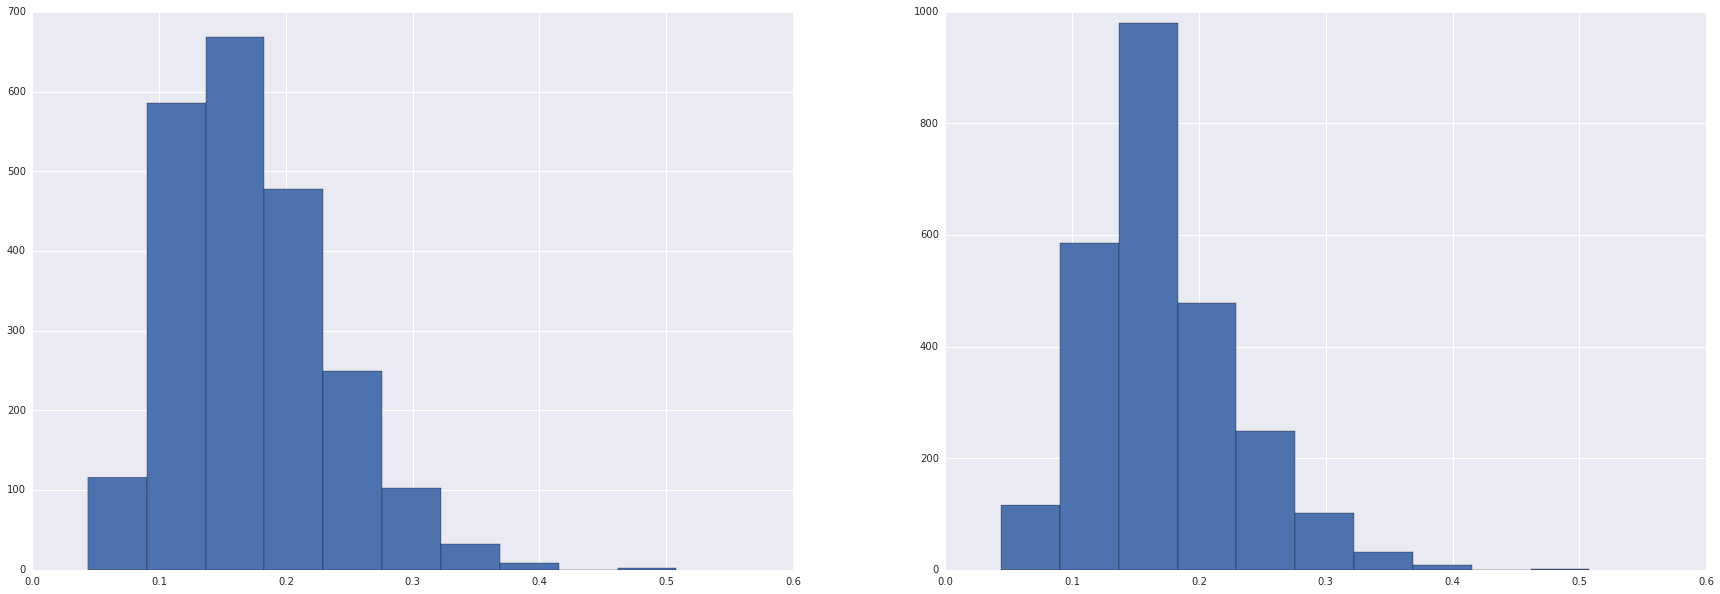

In [71]:
# Check that filling in NaNs didn't do anything strange.
plt.figure(figsize=[30,10]);
plt.subplot(121)
data_train['Poor or fair health'].hist();
plt.subplot(122)
data_nonan_train['Poor or fair health'].hist();

## Save data to use in next notebook

In [72]:
data_nonan_train.to_csv(datadir+'data_nonan_train.csv')
data_nonan_test.to_csv(datadir+'data_nonan_test.csv')
labels_train.to_csv(datadir+'labels_train.csv')
labels_test.to_csv(datadir+'labels_test.csv')